In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def logistic_map(x0 ,miu):
  x = [x0]
  error = 0.01
  x_old, x_new = 0, 0
  i = 0
  for i in range(10000):
    x_new = x[i] * miu * (1 - x[i])
    x.append(x_new)

  return x

def compute_lambda(miu, x):
  lambda_miu = 0

  for i in range(10000):
    lambda_miu += np.log(abs(miu - 2*miu*x[i]))
  
  return lambda_miu/10000

$part A$

In [6]:
miu = np.linspace(0.01 ,5 , 100)
x0 = 0.3
lambda_miu = np.zeros(100)

for i in range(100):
  x = logistic_map(x0, miu[i])
  lambda_miu[i] = compute_lambda(miu[i], x)


<ipython-input-1-897471fd943c>:7: RuntimeWarning: overflow encountered in double_scalars
  x_new = x[i] * miu * (1 - x[i])


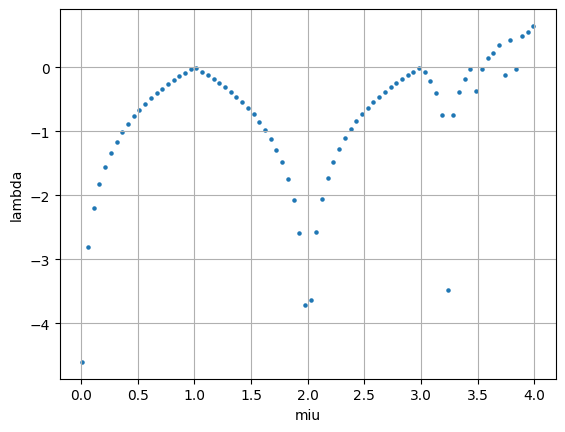

In [7]:
plt.xlabel('miu')
plt.ylabel('lambda')
plt.grid()
plt.scatter(miu, lambda_miu, s=5)

$partB$

In [33]:
def Lorenz_attractor(x0, y0, z0, t):
  len_t = len(t)
  dt = t[1] - t[0]
  x = np.zeros(len_t-1)
  y = np.zeros(len_t-1)
  z = np.zeros(len_t-1)

  x[0], y[0], z[0] = x0, y0, z0

  for i in range(1, len_t-1):
    x[i] = x[i-1] + 10 * (y[i-1] - x[i-1]) * dt
    y[i] = y[i-1] + (-x[i-1]*z[i-1] + 28*x[i-1] - y[i-1]) * dt
    z[i] = z[i-1] + (x[i-1]*y[i-1] - 8/3 * z[i-1]) * dt

  return x, y, z

def compute_lambda_xyz(x, y, z, t):
  nx, ny, nz = len(x), len(y), len(z)
  dt = t[1] - t[0]
  lambda_x, lambda_y, lambda_z = 0,0,0
  for i in range(1,nx):
    lambda_x += np.log(abs(y[i] - x[i]))
    lambda_y += np.log(abs(-x[i-1]*z[i-1] + 28*x[i-1] - y[i-1]))
    lambda_z += np.log(abs(x[i-1]*y[i-1] - 8/3 * z[i-1]))
  lambda_x = lambda_x/nx
  lambda_y = lambda_y/ny
  lambda_z = lambda_z/nz

  return lambda_x, lambda_y, lambda_z

In [34]:
t = np.linspace(0, 2, 100)
x, y, z = Lorenz_attractor(0.5, 0.5, 0.5, t)
lx, ly, lz = compute_lambda_xyz(x, y, z, t)

In [35]:
print('lambda_x:{}'.format(lx))
print('lambda_y:{}'.format(ly))
print('lambda_z:{}'.format(lz))

lambda_x:1.2959755393885397
lambda_y:3.884689721478755
lambda_z:3.664870503715668


In [44]:
def RF4_method(f, alpha, omega, omega1, y0, y_dot0, time):
  
    t = len(time)
    dt = time[1] - time[0]

    y = np.zeros(t)
    y[0] = y0

    y_dot = np.zeros(t)
    y_dot[0] = y_dot0

    for i in range(t-1):
      f1 = y_dot[i]
      k1 = f * np.cos(omega1 * time[i]) - omega**2 * np.sin(y[i]) - alpha * y_dot[i]

      f2 = y_dot[i] + dt*k1/2
      k2 = f * np.cos(omega1 * (time[i] + dt/2)) - omega**2 * np.sin((y[i] + dt*f1/2)) - alpha * f2

      f3 = y_dot[i] + dt*k2/2
      k3 = f * np.cos(omega1 * (time[i] + dt/2)) - omega**2 * np.sin((y[i] + dt*f2/2)) - alpha * f3

      f4 = y_dot[i] + dt*k3/2
      k4 = f * np.cos(omega1 * (time[i] + dt/2)) - omega**2 * np.sin((y[i] + dt*f3/2)) - alpha * f4

      y[i+1] = y[i] + dt*(f1 + 2*f2 + 2*f3 + f4)/6
      y_dot[i+1] = y_dot[i] + dt*(k1 + 2*k2 + 2*k3 + k4)/6


    return y, y_dot


def compute_lambda_theta(f, alpha, omega, omega1, y0, y_dot0, time, y, y_dot):
  nt, ntd = len(y), len(y_dot)
  dt = time[1] - time[0]
  lambda_theta, lambda_theta_dot = 0,0
  t = len(time)

  for i in range(1,nt):
    lambda_theta += np.log(abs((y[i]-y[i-1])/dt))
    lambda_theta_dot +=  np.log(abs((y_dot[i]-y_dot[i-1])/dt))

  return lambda_theta/nt, lambda_theta_dot/ntd

In [45]:
t = np.linspace(0, 2, 100)
r1, r2 = np.random.random(), np.random.random()
theta1, theta_dot1 = RF4_method(.52, .2, 1, .666, r1, r2, t)
ltheta, ltheta_dot = compute_lambda_theta(.52, .2, 1, .666, r1, r2, t, theta1, theta_dot1)

In [46]:
print('lambda_theta:{}'.format(ltheta))
print('lambda_theta dot:{}'.format(ltheta_dot))

lambda_theta:-0.8795049622876756
lambda_theta dot:-1.0757808693922615
